Results summary:
- SCOUT DS + SBERT = 194 components to explain 95.0% of the variance.
- ALFRED DS + SBERT = 165 components to explain 95.0% of the variance.
- TACOPLAY DS + SBERT = 31 components to explain 95.0% of the variance.
- BRIDGE DS + SBERT = 115 components to explain 95.0% of the variance.
- RT1 DS + SBERT = 27 components to explain 95.0% of the variance.

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np  

In [2]:
def extract_embeddings(fp: str, col_name="embedding"):
    df = pd.read_csv(fp)
    embeddings = df[col_name].to_list()
    return [[float(x.strip(" []")) for x in s.split(",")] for s in embeddings]


In [3]:
model_name = "all-mpnet-base-v2" # sbert
dataset_name = "rt1"

results_fp = f"/home/slwanna/neural-feature-extraction/neural_feature_extraction/notebooks/results/01_{model_name}_{dataset_name}"
embeddings = extract_embeddings(f"{results_fp}.csv")

data = np.array(embeddings)

data.shape

(2504036, 768)

In [4]:
pca = PCA()

pca.fit(data)
pca.explained_variance_ratio_.shape

(768,)

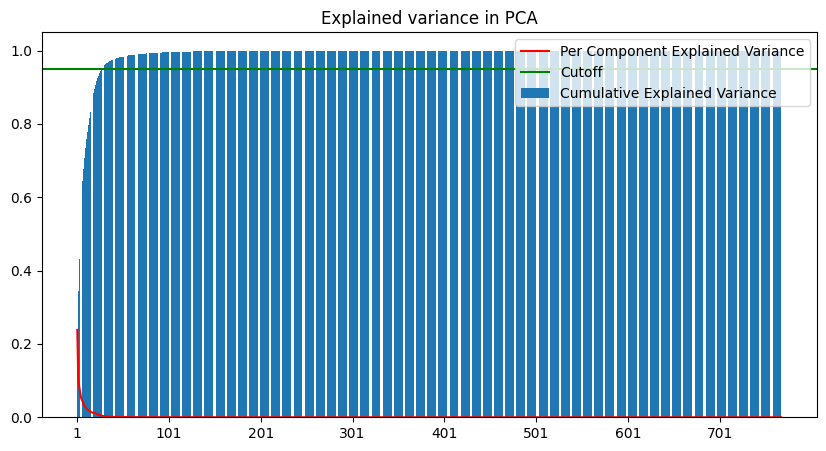

In [5]:
plt.figure(figsize=(10,5))
plt.plot(range(1,769),pca.explained_variance_ratio_, c='red', label='Per Component Explained Variance')
plt.bar(range(1,769), height=np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.axhline(y=0.95, c='g', label='Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(np.arange(1,769,step=100))
plt.legend(loc=1)
plt.show()

In [6]:
threshold = 0.95

explained_variance_n_components_threshold = np.argmax(np.cumsum(pca.explained_variance_ratio_) > threshold)
print(f"You need {explained_variance_n_components_threshold} components to explain {threshold*100}% of the variance.")

You need 27 components to explain 95.0% of the variance.
